In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

%matplotlib inline

In [2]:
df=pd.read_csv("house pricing delhi- MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Location,District,Locality,Parking,Status,Transaction,Type,Per_Sqft,Price
0,807.2925,2,2.0,Unfurnished,Paschim Vihar,West Delhi,"Archana Apartment, Paschim Vihar",1.0,Ready_to_move,Resale,Apartment,14722.0,8600000
1,594.0000,2,1.0,Semi-Furnished,Paschim Vihar,West Delhi,"Ashoka Apartment, Paschim Vihar Block A2",1.0,Ready_to_move,Resale,Apartment,10943.0,6500000
2,900.0000,2,2.0,Semi-Furnished,Punjabi Bagh,West Delhi,"Bhagwan Das Nagar, Punjabi Bagh",1.0,Ready_to_move,Resale,Builder_Floor,16667.0,15000000
3,464.0000,3,1.0,Unfurnished,Punjabi Bagh,West Delhi,"Bhagwan Das Nagar, Punjabi Bagh",1.0,Ready_to_move,Resale,Builder_Floor,15278.0,4200000
4,800.0000,3,2.0,Unfurnished,Paschim Vihar,West Delhi,"DDA Lig Flats, Paschim Vihar",1.0,Ready_to_move,Resale,Apartment,7875.0,6300000


In [3]:
df.shape

(1214, 13)

In [4]:
df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Location', 'District',
       'Locality', 'Parking', 'Status', 'Transaction', 'Type', 'Per_Sqft',
       'Price'],
      dtype='object')

In [5]:
df.drop(columns=['Locality','Furnishing','Parking'],inplace=True)

In [6]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Location         0
District         0
Status           0
Transaction      0
Type             5
Per_Sqft       241
Price            0
dtype: int64

In [7]:
df['Transaction'].unique()

array(['Resale', 'New_Property'], dtype=object)

In [8]:
df['Type'].unique()

array(['Apartment', 'Builder_Floor', nan], dtype=object)

In [9]:
df.shape

(1214, 10)

In [10]:
df2 = df.dropna()
df2.isnull().sum()

Area           0
BHK            0
Bathroom       0
Location       0
District       0
Status         0
Transaction    0
Type           0
Per_Sqft       0
Price          0
dtype: int64

In [11]:
df2.head()

,Area,BHK,Bathroom,Location,District,Status,Transaction,Type,Per_Sqft,Price
0,807.2925,2,2.0,Paschim Vihar,West Delhi,Ready_to_move,Resale,Apartment,14722.0,8600000
1,594.0000,2,1.0,Paschim Vihar,West Delhi,Ready_to_move,Resale,Apartment,10943.0,6500000
2,900.0000,2,2.0,Punjabi Bagh,West Delhi,Ready_to_move,Resale,Builder_Floor,16667.0,15000000
3,464.0000,3,1.0,Punjabi Bagh,West Delhi,Ready_to_move,Resale,Builder_Floor,15278.0,4200000
4,800.0000,3,2.0,Paschim Vihar,West Delhi,Ready_to_move,Resale,Apartment,7875.0,6300000


In [12]:
dummies = pd.get_dummies(df2.Location)
dummies.head(3)

,Alaknanda,Budh Vihar,Chhattarpur,Chittaranjan Park,Dilshad Garden,Dwarka,Friends Colony,Geeta Colony,Greater Kailash,Hauz Khas,...,Rohini,Safdarjung Enclave,Saket,Sarita Vihar,Shahdara,Sheikh Sarai,Sultanpur,Uttam Nagar,Vasant Kunj,Vasundhara
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df3 = pd.concat([df2,dummies],axis='columns')
df3.head()
df3 = df3.drop('Location',axis='columns')
df3.head(2)

,Area,BHK,Bathroom,District,Status,Transaction,Type,Per_Sqft,Price,Alaknanda,...,Rohini,Safdarjung Enclave,Saket,Sarita Vihar,Shahdara,Sheikh Sarai,Sultanpur,Uttam Nagar,Vasant Kunj,Vasundhara
0,807.2925,2,2.0,West Delhi,Ready_to_move,Resale,Apartment,14722.0,8600000,0,...,0,0,0,0,0,0,0,0,0,0
1,594.0000,2,1.0,West Delhi,Ready_to_move,Resale,Apartment,10943.0,6500000,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dummies = pd.get_dummies(df3.Transaction)
df3 = pd.concat([df3,dummies],axis='columns')
df3.head()
df3 = df3.drop('Transaction',axis='columns')
df3.head(2)

,Area,BHK,Bathroom,District,Status,Type,Per_Sqft,Price,Alaknanda,Budh Vihar,...,Saket,Sarita Vihar,Shahdara,Sheikh Sarai,Sultanpur,Uttam Nagar,Vasant Kunj,Vasundhara,New_Property,Resale
0,807.2925,2,2.0,West Delhi,Ready_to_move,Apartment,14722.0,8600000,0,0,...,0,0,0,0,0,0,0,0,0,1
1,594.0000,2,1.0,West Delhi,Ready_to_move,Apartment,10943.0,6500000,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
dummies = pd.get_dummies(df3.District)
df3 = pd.concat([df3,dummies],axis='columns')
df3.head()
df3 = df3.drop('District',axis='columns')
df3.head(2)

,Area,BHK,Bathroom,Status,Type,Per_Sqft,Price,Alaknanda,Budh Vihar,Chhattarpur,...,South West Delhi,Central Delhi,East Delhi,North West Delhi,Shahdara,South Delhi,South East Delhi,South West,South West Delhi,West Delhi
0,807.2925,2,2.0,Ready_to_move,Apartment,14722.0,8600000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,594.0000,2,1.0,Ready_to_move,Apartment,10943.0,6500000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
dummies = pd.get_dummies(df3.Type)
df3 = pd.concat([df3,dummies],axis='columns')
df3.head()
df3 = df3.drop('Type',axis='columns')
df3.head(2)

,Area,BHK,Bathroom,Status,Per_Sqft,Price,Alaknanda,Budh Vihar,Chhattarpur,Chittaranjan Park,...,East Delhi,North West Delhi,Shahdara,South Delhi,South East Delhi,South West,South West Delhi,West Delhi,Apartment,Builder_Floor
0,807.2925,2,2.0,Ready_to_move,14722.0,8600000,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,594.0000,2,1.0,Ready_to_move,10943.0,6500000,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [17]:
dummies = pd.get_dummies(df3.Status)
df3 = pd.concat([df3,dummies],axis='columns')
df3.head()
df3 = df3.drop('Status',axis='columns')
df3.head(2)

,Area,BHK,Bathroom,Per_Sqft,Price,Alaknanda,Budh Vihar,Chhattarpur,Chittaranjan Park,Dilshad Garden,...,Shahdara,South Delhi,South East Delhi,South West,South West Delhi,West Delhi,Apartment,Builder_Floor,Almost_ready,Ready_to_move
0,807.2925,2,2.0,14722.0,8600000,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,594.0000,2,1.0,10943.0,6500000,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


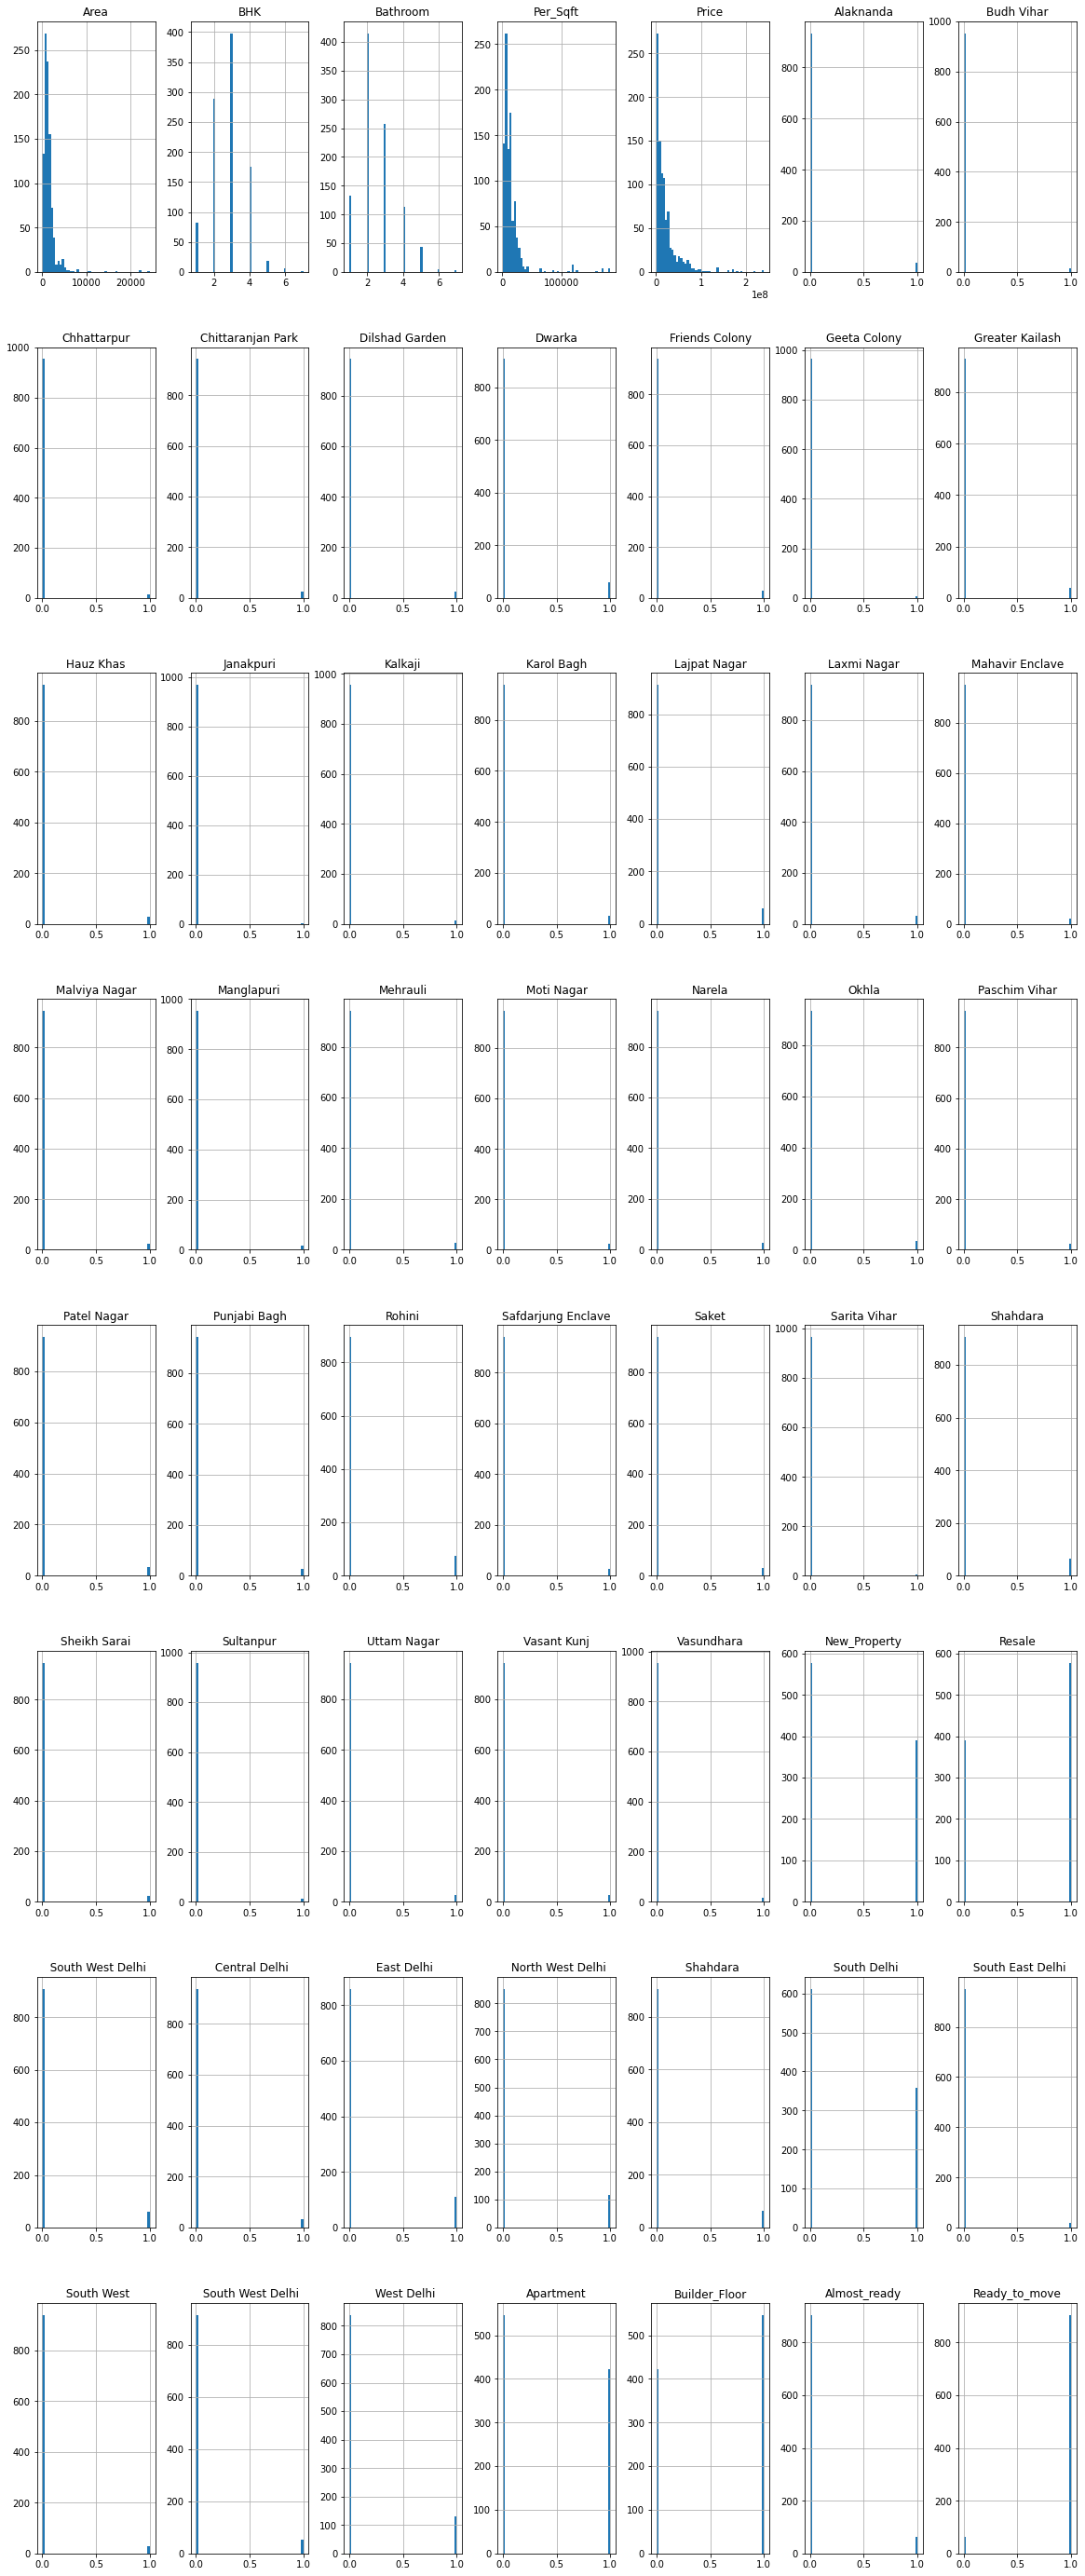

In [18]:
df3.hist(bins = 50, figsize = (20,50))
#save_fig("att_hist_plots")
plt.show()

In [19]:
df3.corr()

,Area,BHK,Bathroom,Per_Sqft,Price,Alaknanda,Budh Vihar,Chhattarpur,Chittaranjan Park,Dilshad Garden,...,Shahdara,South Delhi,South East Delhi,South West,South West Delhi,West Delhi,Apartment,Builder_Floor,Almost_ready,Ready_to_move
Area,1.000000,0.454772,0.533702,0.164232,0.568422,-0.021686,-0.050766,-0.035806,0.039092,-0.058781,...,-0.077573,0.198959,-0.027610,0.042082,-0.043003,0.040488,-0.114624,0.114624,0.178546,-0.178546
BHK,0.454772,1.000000,0.801863,0.178654,0.585372,-0.058216,-0.037029,-0.040210,0.046155,-0.111249,...,0.018858,0.141227,-0.058762,0.086151,-0.078844,0.030163,-0.176919,0.176919,0.141559,-0.141559
Bathroom,0.533702,0.801863,1.000000,0.225014,0.729550,-0.039402,-0.056948,-0.031119,0.090864,-0.135960,...,-0.135266,0.283228,-0.029725,0.127703,-0.057759,0.019603,-0.191710,0.191710,0.162858,-0.162858
Per_Sqft,0.164232,0.178654,0.225014,1.000000,0.325144,-0.029423,-0.017304,-0.066185,-0.011919,-0.051328,...,-0.033876,0.205217,-0.007847,0.005902,-0.041665,-0.022970,-0.094765,0.094765,0.021525,-0.021525
Price,0.568422,0.585372,0.729550,0.325144,1.000000,-0.034884,-0.085365,-0.060212,0.027744,-0.083705,...,-0.096782,0.295946,-0.039111,0.136232,-0.068299,0.028153,-0.134982,0.134982,0.210349,-0.210349
Alaknanda,-0.021686,-0.058216,-0.039402,-0.029423,-0.034884,1.000000,-0.025083,-0.024273,-0.032143,-0.031502,...,-0.051047,0.253456,-0.025868,-0.033392,-0.047027,-0.076199,0.198083,-0.198083,-0.051047,0.051047
Budh Vihar,-0.050766,-0.037029,-0.056948,-0.017304,-0.085365,-0.025083,1.000000,-0.016247,-0.021515,-0.021086,...,-0.034168,-0.098963,-0.017315,-0.022351,-0.031477,-0.051004,-0.064810,0.064810,-0.034168,0.034168
Chhattarpur,-0.035806,-0.040210,-0.031119,-0.066185,-0.060212,-0.024273,-0.016247,1.000000,-0.020821,-0.020406,...,-0.033066,0.164177,-0.016756,-0.021630,-0.030462,-0.049359,-0.059558,0.059558,0.034745,-0.034745
Chittaranjan Park,0.039092,0.046155,0.090864,-0.011919,0.027744,-0.032143,-0.021515,-0.020821,1.000000,-0.027022,...,-0.043786,0.217406,-0.022189,-0.028643,-0.040338,-0.065361,-0.120085,0.120085,-0.043786,0.043786
Dilshad Garden,-0.058781,-0.111249,-0.135960,-0.051328,-0.083705,-0.031502,-0.021086,-0.020406,-0.027022,1.000000,...,-0.042913,-0.124292,-0.021747,-0.028072,-0.039534,-0.064058,0.080248,-0.080248,-0.042913,0.042913


In [83]:
from sklearn.model_selection import train_test_split
X= df3.drop('Price',axis='columns')
Y = df3.Price
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state=10)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=100,random_state=0)

In [22]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [23]:
y_pred1=rf.predict(X_test)

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.8703364313214488

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

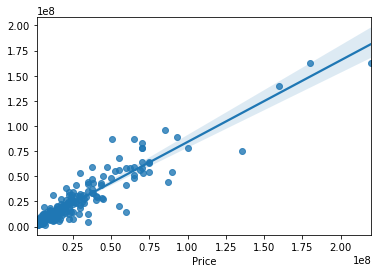

In [87]:
import seaborn as sns
sns.regplot(y_test,y_pred1)
